<a href="https://colab.research.google.com/github/felixgaschi/word-image-similarity/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SpottingNet: Word image similarity

In [2]:
import numpy as np
import os
import csv
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

## Features maps

In [4]:
labels = np.loadtxt("../embeddings/target.csv", dtype=np.int8)

In [5]:
liste = sorted([d for d in os.listdir("../embeddings") if os.path.isdir("../embeddings/" + d)], key=lambda x: int(x))

In [6]:
channels = [[d + "/" + file for file in os.listdir("../embeddings/" + d)] for d in liste]

In [7]:
NB_WORDS = np.max(labels) + 1

In [8]:
scores = []
details = []
pbar = tqdm_notebook(total=int(np.sum([len(c) for c in channels])))
for i in range(len(liste)):
    ch_scores = []
    ch_details = []
    for j in range(len(channels[i])):
        means = [None for _ in range(NB_WORDS)]
        count = [0 for _ in range(NB_WORDS)]
        with open("../embeddings/" +  channels[i][j], "r") as f:
            reader = csv.reader(f)
            for k, row in enumerate(reader):
                x = np.array([float(r) for r in row])
                if means[labels[k]] is None:
                    means[labels[k]] = x
                else:
                    means[labels[k]] += x
                count[labels[k]] += 1
        
        means = np.array([means[k] / count[k] for k in range(NB_WORDS)])
        
        inner_distance = [None for _ in range(NB_WORDS)]
        
        with open("../embeddings/" + channels[i][j], "r") as f:
            reader = csv.reader(f)
            for k, row in enumerate(reader):
                x = np.array([float(r) for r in row])
                if inner_distance[labels[k]] is None:
                    inner_distance[labels[k]] = np.inner(x - means[labels[k]], x - means[labels[k]])
                else:
                    inner_distance[labels[k]] += np.inner(x - means[labels[k]], x - means[labels[k]])
        
        inner_distance = np.array([inner_distance[k] / count[k] for k in range(NB_WORDS)])
        
        outer_distance = np.zeros((NB_WORDS, NB_WORDS))
        
        min_outer = np.inf
        for k in range(NB_WORDS):
            for l in range(NB_WORDS):
                dist = np.inner(means[k] - means[l], means[k] - means[l])
                if dist < min_outer and k != l:
                    min_outer = dist
                outer_distance[k,l] = dist
        
        ch_scores.append(min_outer / np.max(inner_distance))
        
        ch_details.append({
            "means": means,
            "inner": inner_distance,
            "outer": outer_distance
        })
        pbar.update(1)
        
    scores.append(ch_scores)
    details.append(ch_details)
                
pbar.close()           

A Jupyter Widget

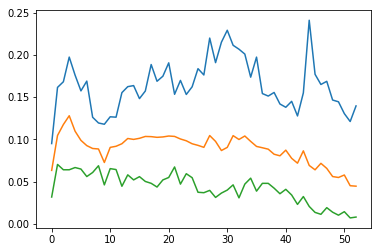

In [9]:
plt.plot([np.max(s) for s in scores])
plt.plot([np.mean(s) for s in scores])
plt.plot([np.min(s) for s in scores])
plt.show()

In [10]:
i_max = np.argmax([np.max(s) for s in scores])
j_max = np.argmax(scores[i_max])

In [10]:
details[i_max][j_max]

{'means': array([[ 0.04029039, -0.03676265, -0.06086512, -0.05390608, -0.05481697,
         -0.0117073 , -0.00923775, -0.02807629, -0.05302605, -0.03519315,
         -0.01038889, -0.033282  , -0.04487957, -0.06478451, -0.05590344,
         -0.05335381],
        [ 0.088095  , -0.01822767, -0.05456353, -0.09544735, -0.04459353,
          0.02048981, -0.00638178, -0.08793949, -0.03737051,  0.01975135,
          0.03847416, -0.08240661, -0.04669156, -0.01870838, -0.01348326,
         -0.07375345],
        [ 0.01252509, -0.03216474, -0.05495809, -0.05541478, -0.04410916,
          0.03837916,  0.01199008, -0.05731449, -0.03692277,  0.01959977,
          0.01816929, -0.05141298, -0.03340416, -0.01429645, -0.05656795,
         -0.08596411]]),
 'inner': array([0.05105406, 0.05262783, 0.04812616]),
 'outer': array([[0.        , 0.02153387, 0.01290851],
        [0.02153387, 0.        , 0.01267802],
        [0.01290851, 0.01267802, 0.        ]])}

In [11]:
i = 27
j = np.argmax(scores[i])
scores[i][j]

0.21978778740994098

In [12]:
details[i][j]

{'means': array([[-0.05707329, -0.02915685, -0.03502619, -0.01722032, -0.02934259,
          0.00777362, -0.04654155, -0.12935834, -0.18892331, -0.1330025 ,
         -0.13186908, -0.16064647, -0.1355929 , -0.10487025, -0.17364292,
         -0.09718999, -0.12344784, -0.13182106, -0.13423251, -0.16904535,
         -0.09955455, -0.1229465 , -0.08531048, -0.07836803, -0.06610433,
         -0.06497242, -0.0462165 , -0.08896755, -0.19194081, -0.23166452,
         -0.21285258, -0.25413228, -0.27367231, -0.22015812, -0.16885601,
         -0.1637133 ,  0.00864304, -0.0617801 , -0.04576126, -0.05644257,
         -0.03248154, -0.08255146, -0.12961691, -0.19717277, -0.14071038,
         -0.13581104, -0.16462857, -0.13838206, -0.10472946, -0.11821754,
         -0.11121429, -0.11569645, -0.12805174, -0.13906017, -0.15930974,
         -0.11559179],
        [-0.12918173, -0.00736536, -0.02412089, -0.02569787, -0.04884626,
         -0.05643117, -0.06444407, -0.13571332, -0.08917337, -0.14283547,
      

In [11]:
i_max, j_max

(44, 212)

In [12]:
i_max2 = np.argmax([0 if i == i_max else np.max(s) for i, s in enumerate(scores)])
j_max2 = np.argmax(scores[i_max])

In [13]:
i_max2, j_max2

(30, 212)

In [20]:
from PIL import Image

a = Image.open("../dataset/word-000004.png")

In [23]:
import torchvision.transforms as transforms
import torch

def transformation():
    return transforms.Compose([
        transforms.Resize((40, 100)),
        transforms.ToTensor(),
        transforms.Lambda(lambda img: torch.cat((img, img, img), 1)),
        transforms.Normalize(mean=[0.45, 0.45], std=[0.22, 0.22])
    ])

In [35]:
b = transformation()(a)
b = torch.unsqueeze(torch.cat((b, b, b), 0), 0)
b.size()

torch.Size([1, 3, 120, 100])

In [38]:
from torchvision.models import resnet50

model = resnet50(pretrained=True)
model.avgpool = nn.AdaptiveAvgPool2d(1)

In [39]:
import torch.nn as nn

outputs = []
layers_idx = {}

def hook(module, input, output):
    outputs.append(output)

def add_hooks(model):
    for layer in model.children():
        if isinstance(layer, nn.modules.conv.Conv2d):
            layer.register_forward_hook(hook)
        else:
            add_hooks(layer)

add_hooks(model)

model(b)

tensor([[-1.0000, -0.3703, -0.5425, -0.9105, -0.3789, -0.2506, -0.6680,  0.4417,
          0.0713, -0.5163, -0.9663, -0.8393, -0.3535, -0.9693, -1.0318, -0.3898,
         -0.7759, -0.2653, -0.1607, -0.4409, -1.1840, -0.7101, -1.2527, -0.2427,
         -1.0186, -0.5699, -0.7634, -0.6679, -0.4699, -0.4329, -0.7862, -0.9698,
         -0.6953, -0.4671, -0.1201, -0.6227,  0.5760, -0.5939, -0.4465,  0.1549,
         -0.7212, -0.7432, -0.6663, -0.4540, -0.3002, -0.3045, -0.5943, -0.5565,
         -1.0565, -0.7863, -0.3529,  0.1375, -0.3844, -0.3656, -0.1778, -0.9674,
         -0.4776, -0.9795, -0.2550, -0.1422,  0.5780,  0.0438, -0.1215,  0.0232,
         -0.7126, -0.1570, -0.3111, -0.1121, -0.6170, -0.4815, -1.2965,  0.1792,
         -1.3384, -0.5923, -0.8789, -0.8110,  0.0859, -0.2547,  0.2157,  0.1273,
         -0.9495, -1.5246, -0.0469, -0.6712, -0.5753, -0.2632, -0.0196,  0.3759,
         -0.1314, -0.6915, -0.7310, -1.2163, -1.4743, -0.3058,  0.0224, -1.6086,
         -0.3829, -0.5310, -

In [40]:
outputs

[tensor([[[[-4.0259e+00, -3.8014e+00, -3.7417e+00,  ..., -3.5488e+00,
            -3.6615e+00, -1.7370e+00],
           [-3.9513e-01, -3.0123e-01, -3.6625e-01,  ..., -1.9843e+00,
            -6.1866e-01, -5.7442e-01],
           [-3.0623e-01, -3.2121e-01, -4.2292e-01,  ..., -2.5507e+00,
            -1.2584e+00, -3.5967e-01],
           ...,
           [-2.1747e-01, -2.1895e-01, -2.9711e-01,  ..., -1.6939e-01,
            -3.0113e-01, -3.1272e-01],
           [-1.3559e-01, -1.5851e-01, -2.6090e-01,  ..., -3.9762e-01,
            -2.7613e-01, -3.7044e-01],
           [-1.9192e+00, -3.5354e+00, -3.6934e+00,  ..., -3.5746e+00,
            -3.6416e+00, -4.1483e+00]],
 
          [[ 5.8404e-02,  1.7792e-02,  1.4089e-01,  ...,  1.3692e-01,
             1.3591e-01,  2.1839e-01],
           [ 1.1999e-01,  1.4879e-01,  2.9550e-01,  ...,  2.4037e-01,
             2.4106e-01,  3.3620e-01],
           [ 2.0629e-01,  2.6284e-01,  4.2891e-01,  ...,  3.2127e-01,
             2.7235e-01,  4.2588e-01],


In [48]:
c = outputs[i_max2].detach().numpy()[0,j_max2]

In [49]:
c

array([[-0.11511286, -0.04359571, -0.00230968, -0.0497325 , -0.08042398,
        -0.05832759, -0.03864181],
       [ 0.00658048, -0.02802739,  0.0048265 , -0.00525969, -0.02061337,
        -0.00651868, -0.02999193],
       [ 0.00349651, -0.00664704, -0.02308259, -0.01686698, -0.03220487,
        -0.01324371, -0.03349294],
       [-0.0793943 , -0.00557976,  0.01194383,  0.04071904,  0.01701795,
         0.01024633, -0.0449027 ],
       [-0.01651086,  0.00341991,  0.03111886, -0.0041905 , -0.03976663,
        -0.0431777 , -0.09390652],
       [-0.03725325, -0.04471795, -0.01265043, -0.05150956, -0.08668288,
        -0.08255671, -0.036614  ],
       [ 0.01116246, -0.02296581, -0.04101659, -0.05353081, -0.01174564,
        -0.02303267, -0.0193478 ],
       [-0.04023658, -0.03023507, -0.06476321, -0.04934801, -0.01963424,
        -0.04527954, -0.06461952]], dtype=float32)

In [54]:
Image.fromarray(c).show()

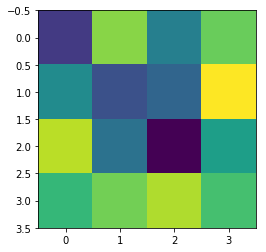

In [53]:
c2 = outputs[i_max].detach().numpy()[0,j_max]
plt.imshow(c2)
plt.show()